In [ ]:
import pandas as pd 

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')
dados.head()

renomear = { 'expected_hours' : 'horas_esperadas', 'price' : 'preco', 'unfinished': 'nao_finalizado'}

dados = dados.rename(columns = renomear)
dados.head()

#1 não finalizado
#0 finalizado
#para não confunfir vamos trocar o valor 0 para o valor 1 para ficar do jeito padrão 

trocar = {0:1,
          1:0}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()


,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


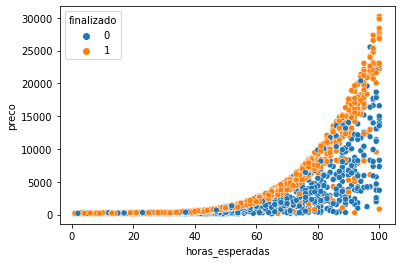

In [ ]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas",y ="preco", hue='finalizado',data=dados)

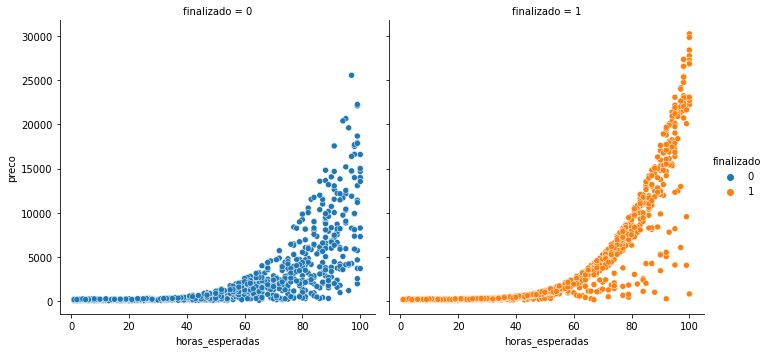

In [ ]:
sns.relplot(x = "horas_esperadas",y ="preco" ,hue='finalizado',col="finalizado" ,data=dados)

In [ ]:
#remodelando 

x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

SEED = 5

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, train_test_split


x_treino,x_teste, y_treino, y_teste = train_test_split(x, y, random_state= SEED, test_size = 0.25, stratify = y )

print('Treinamos com %d dados e testamos com %d' % (len(x_treino),len(x_teste)))

from sklearn.svm import LinearSVC

modelo = LinearSVC()

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    modelo.fit(x_treino, y_treino)
# modelo.fit(x_treino, y_treino)

previsao = modelo.predict(x_teste)

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste,previsao)
acuracia


Treinamos com 1617 dados e testamos com 540


0.5981481481481481

In [ ]:
#não sei se a acuracia foi satisfatoria, então precisamos supor que os 540 testes foram finalizados
#fazer então 540 testes sejam 1 
#algoritmo de baseline
import numpy as np

previsoes_simuladas = np.ones(540)

acuracia_simulada = accuracy_score(y_teste,previsoes_simuladas)
acuracia_simulada*100

#temos que melhorar a acuracia

52.59259259259259

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

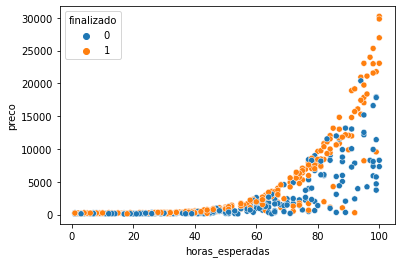

In [ ]:
sns.scatterplot(x = "horas_esperadas",y ="preco", hue=y_teste,data=x_teste)

#vamos preencher cada pixel com dados simulados pelo algoritimo 

x_min = x_teste.horas_esperadas.min()
x_max = x_teste.horas_esperadas.max()

y_min = x_teste.preco.min()
y_max = x_teste.preco.max()

pixels=100 

eixo_x = np.arange(x_min,x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min,y_max, (y_max - y_min)/pixels)

#juntar os pixels
#concatenar
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

In [ ]:
#então precisamos pegar nosso modelo e preve para todos esses pontos

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


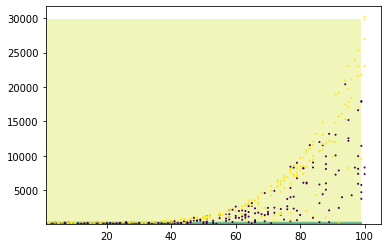

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(x_teste.horas_esperadas,x_teste.preco, c =y_teste, s=1)

#curva de decisão não satisfatória => borda de decisão => se eu mudo o SEED a curva de decisão também muda
#precisamos de um algoritimo melhor para aprender um padrão mais inteligente